1. What is hypothesis testing in statistics?
Hypothesis testing is a statistical method used to make decisions about a population based on sample data. It involves formulating a null hypothesis and an alternative hypothesis, then using sample data to determine which is more likely.

2. What is the null hypothesis, and how does it differ from the alternative hypothesis?
Null Hypothesis (H₀): Assumes no effect or no difference.
Alternative Hypothesis (H₁): Assumes there is an effect or a difference.
They are opposites; rejecting H₀ suggests support for H₁. 

3. What is the significance level in hypothesis testing, and why is it important?
The significance level (α) is the probability of rejecting the null hypothesis when it is actually true (Type I error). Common values: 0.05, 0.01. It sets the threshold for determining statistical significance.

4. What does a P-value represent in hypothesis testing?
The P-value is the probability of obtaining a result at least as extreme as the one observed, assuming the null hypothesis is true.

5. How do you interpret the P-value in hypothesis testing?
If P-value ≤ α: Reject the null hypothesis.
If P-value > α: Fail to reject the null hypothesis.


6. What are Type 1 and Type 2 errors in hypothesis testing?
Type 1 Error: Rejecting a true null hypothesis.
Type 2 Error: Failing to reject a false null hypothesis.

7. What is the difference between a one-tailed and a two-tailed test in hypothesis testing?
One-tailed test: Tests for deviation in one direction.
Two-tailed test: Tests for deviation in both directions.

8. What is the Z-test, and when is it used in hypothesis testing?
Used when sample size is large (n > 30) and population variance is known. It assesses whether the sample mean differs from the population mean.

9. How do you calculate the Z-score, and what does it represent in hypothesis testing?
Z= σ/ n(X−μ)	
It measures how many standard deviations a sample mean is from the population mean.

10. What is the T-distribution, and when should it be used instead of the normal distribution?
Used when the sample size is small (n < 30) and population standard deviation is unknown. It accounts for extra variability in smaller samples.

11. What is the difference between a Z-test and a T-test?
Z-test: Known population variance, large sample.
T-test: Unknown population variance, small sample.

12. What is the T-test, and how is it used in hypothesis testing?
A T-test compares sample means to test if they are significantly different from each other or from a population mean.

13. What is the relationship between Z-test and T-test in hypothesis testing?
Both are used to compare means. The choice depends on sample size and whether population variance is known.

14. What is a confidence interval, and how is it used to interpret statistical results?
A range of values within which the true population parameter lies with a certain level of confidence (e.g., 95%).

15. What is the margin of error, and how does it affect the confidence interval?
The margin of error determines the range around the sample estimate. A larger margin results in a wider confidence interval.

16. How is Bayes' Theorem used in statistics, and what is its significance?
Bayes' Theorem updates the probability of a hypothesis based on new evidence. It’s fundamental to Bayesian statistics.

17. What is the Chi-square distribution, and when is it used?
Used for categorical data analysis, especially in goodness-of-fit tests and independence tests.

18. What is the Chi-square goodness of fit test, and how is it applied?
It tests whether a sample matches an expected distribution. Compares observed and expected frequencies.

19. What is the F-distribution, and when is it used in hypothesis testing?
Used to compare two variances or multiple means. Commonly appears in ANOVA and regression analysis.

20. What is an ANOVA test, and what are its assumptions?
ANOVA (Analysis of Variance) compares means of three or more groups. Assumptions:
Normality
Homogeneity of variances
Independence

21. What are the different types of ANOVA tests?
One-way ANOVA: One independent variable.
Two-way ANOVA: Two independent variables.
Repeated Measures ANOVA: Repeated observations on the same subjects.

22. What is the F-test, and how does it relate to hypothesis testing?
The F-test compares variances or fits of models. In ANOVA, it checks if group means are significantly different.

In [7]:
# 1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.
import numpy as np
from scipy import stats

sample = np.array([100, 102, 98, 101, 99, 97, 103])
population_mean = 100
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
print("Q1: Z-score:", z_score, "P-value:", p_value)

Q1: Z-score: 0.0 P-value: 1.0


In [9]:
# 2. Simulate random data to perform hypothesis testing and calculate the corresponding P–value using Python.
data = np.random.normal(loc=100, scale=15, size=50)
t_stat, p_val = stats.ttest_1samp(data, 100)
print("Q2: T-statistic:", t_stat, "P-value:", p_val)

Q2: T-statistic: 1.3746931185576574 P-value: 0.175480877643013


In [11]:
# 3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean.
sample = np.random.normal(50, 10, 30)
pop_mean = 52
z = (np.mean(sample) - pop_mean) / (np.std(sample, ddof=1) / np.sqrt(len(sample)))
p = 2 * (1 - stats.norm.cdf(abs(z)))
print("Q3: Z-score:", z, "P-value:", p)

Q3: Z-score: -0.2944306672369627 P-value: 0.768428835828217


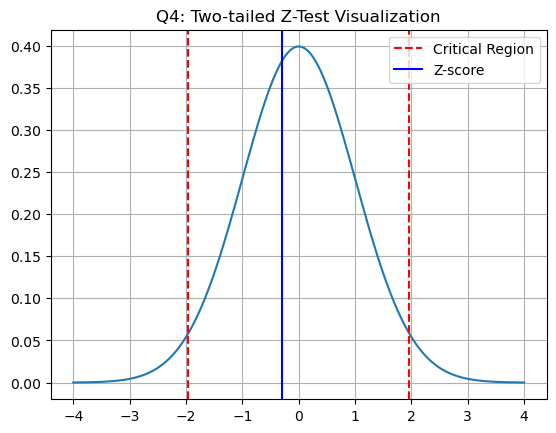

In [13]:
# 4. Perform a two–tailed Z-test using Python and visualize the decision region on a plot.
import matplotlib.pyplot as plt

z_val = np.linspace(-4, 4, 1000)
plt.plot(z_val, stats.norm.pdf(z_val))
plt.axvline(x=-1.96, color='red', linestyle='--', label='Critical Region')
plt.axvline(x=1.96, color='red', linestyle='--')
plt.axvline(x=z, color='blue', linestyle='-', label='Z-score')
plt.title("Q4: Two-tailed Z-Test Visualization")
plt.legend()
plt.grid(True)
plt.show()

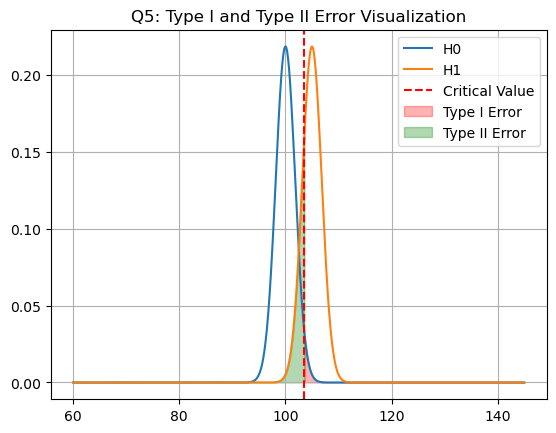

In [15]:
# 5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.
def visualize_errors(mu0, mu1, sigma, n, alpha):
    x = np.linspace(mu0 - 4*sigma, mu1 + 4*sigma, 1000)
    se = sigma / np.sqrt(n)
    z_crit = stats.norm.ppf(1 - alpha / 2)
    critical_value = mu0 + z_crit * se

    plt.plot(x, stats.norm.pdf(x, mu0, se), label='H0')
    plt.plot(x, stats.norm.pdf(x, mu1, se), label='H1')
    plt.axvline(x=critical_value, color='red', linestyle='--', label='Critical Value')
    plt.fill_between(x, 0, stats.norm.pdf(x, mu0, se), where=(x > critical_value), color='red', alpha=0.3, label='Type I Error')
    plt.fill_between(x, 0, stats.norm.pdf(x, mu1, se), where=(x < critical_value), color='green', alpha=0.3, label='Type II Error')
    plt.legend()
    plt.title("Q5: Type I and Type II Error Visualization")
    plt.grid(True)
    plt.show()

visualize_errors(100, 105, 10, 30, 0.05)

In [17]:
# 6. Write a Python program to perform an independent T–test and interpret the results.
group1 = np.random.normal(60, 10, 30)
group2 = np.random.normal(65, 10, 30)
t_stat, p_val = stats.ttest_ind(group1, group2)
print("Q6: Independent T-test T-statistic:", t_stat, "P-value:", p_val)

Q6: Independent T-test T-statistic: 0.18196840809009662 P-value: 0.8562420111262343


Q7: Paired T-test T-statistic: -6.357978734745414 P-value: 5.994674098723549e-07


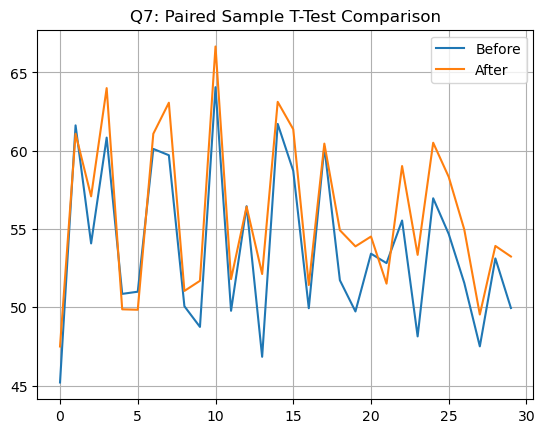

In [19]:
# 7. Perform a paired sample T–test using Python and visualize the comparison results.
before = np.random.normal(55, 5, 30)
after = before + np.random.normal(2, 2, 30)
t_stat, p_val = stats.ttest_rel(before, after)
print("Q7: Paired T-test T-statistic:", t_stat, "P-value:", p_val)

plt.figure()
plt.plot(before, label='Before')
plt.plot(after, label='After')
plt.legend()
plt.title("Q7: Paired Sample T-Test Comparison")
plt.grid(True)
plt.show()

In [21]:
# 8. Simulate data and perform both Z-test and T-test, then compare the results using Python.
sample = np.random.normal(100, 15, 50)
mean_pop = 100
z = (np.mean(sample) - mean_pop) / (np.std(sample, ddof=1) / np.sqrt(len(sample)))
t_stat, p_val_t = stats.ttest_1samp(sample, mean_pop)
p_val_z = 2 * (1 - stats.norm.cdf(abs(z)))
print("Q8: Z-test P-value:", p_val_z, "T-test P-value:", p_val_t)

Q8: Z-test P-value: 0.5276584151411399 T-test P-value: 0.5305940178494681


In [23]:
# 9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance.
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data)
    margin = se * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return mean - margin, mean + margin

ci = confidence_interval(sample)
print("Q9: 95% Confidence Interval:", ci)

Q9: 95% Confidence Interval: (97.37116743804927, 105.03861641377992)


In [25]:
# 10. Write a Python program to calculate the margin of error for a given confidence level using sample data.
def margin_of_error(data, confidence=0.95):
    se = stats.sem(data)
    margin = se * stats.t.ppf((1 + confidence) / 2, len(data)-1)
    return margin

print("Q10: Margin of Error:", margin_of_error(sample))

Q10: Margin of Error: 3.8337244878653265


In [27]:
# 11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.
def bayes_theorem(prior_A, likelihood_B_given_A, prob_B):
    return (likelihood_B_given_A * prior_A) / prob_B

print("Q11: Bayesian Result:", bayes_theorem(0.01, 0.9, 0.05))  # Example values

Q11: Bayesian Result: 0.18000000000000002


In [29]:
# 12. Perform a Chi-square test for independence between two categorical variables in Python.
from scipy.stats import chi2_contingency

data = np.array([[10, 20, 30], [20, 15, 25]])
chi2, p, dof, ex = chi2_contingency(data)
print("Q12: Chi-square Statistic:", chi2, "P-value:", p)

Q12: Chi-square Statistic: 4.502164502164502 P-value: 0.10528521784009057


In [31]:
# 13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data.
print("Q13: Expected Frequencies:", ex)

Q13: Expected Frequencies: [[15.  17.5 27.5]
 [15.  17.5 27.5]]


In [33]:
# 14. Perform a goodness–of–fit test using Python to compare the observed data to an expected distribution.
observed = np.array([30, 14, 56])
expected = np.array([33, 17, 50])
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
print("Q14: Goodness-of-fit Chi-square Statistic:", chi2_stat, "P-value:", p_value)

Q14: Goodness-of-fit Chi-square Statistic: 1.522139037433155 P-value: 0.46716651639264084


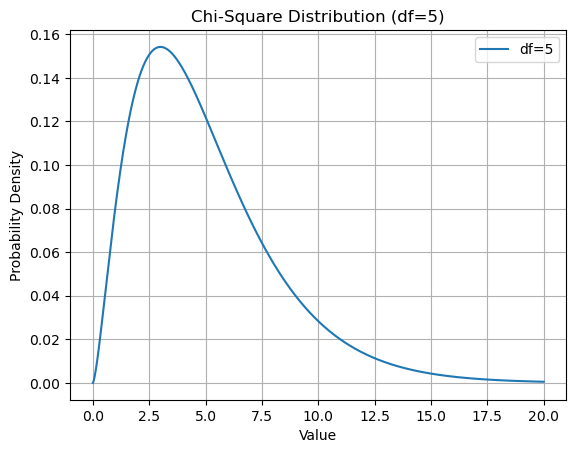

In [41]:
# 15. Simulate and visualize the Chi-square distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

df = 5
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df)
plt.plot(x, y, label=f'df={df}')
plt.title("Chi-Square Distribution (df=5)")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()


In [43]:
# 16. Implement an F-test to compare variances
from scipy.stats import f

np.random.seed(0)
group1 = np.random.normal(20, 5, 100)
group2 = np.random.normal(20, 10, 100)
f_stat = np.var(group1, ddof=1) / np.var(group2, ddof=1)
dfn = len(group1) - 1
dfd = len(group2) - 1
p_val = 1 - f.cdf(f_stat, dfn, dfd)
print("F-statistic:", f_stat, "P-value:", p_val)

F-statistic: 0.23722387971547282 P-value: 0.9999999999966487


In [45]:
# 17. Perform ANOVA test to compare means of multiple groups
from scipy.stats import f_oneway

g1 = np.random.normal(10, 2, 30)
g2 = np.random.normal(12, 2, 30)
g3 = np.random.normal(14, 2, 30)
anova = f_oneway(g1, g2, g3)
print("ANOVA result:", anova)

ANOVA result: F_onewayResult(statistic=34.60235112273695, pvalue=8.777968000006948e-12)


/var/folders/sm/m34mzjsd2wx8hl85lrx3gqqm0000gn/T/ipykernel_26851/4025603390.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Group 1', 'Group 2', 'Group 3'])


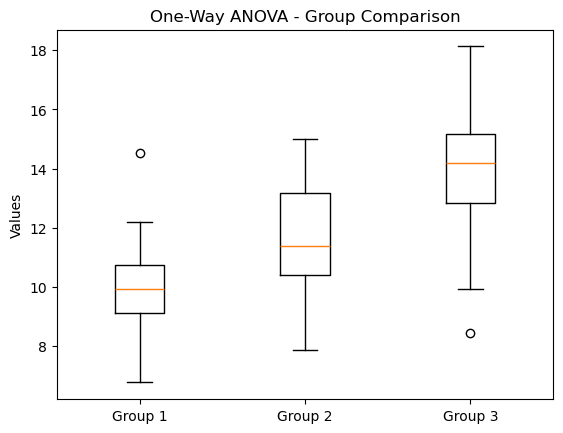

In [47]:
# 18. One-way ANOVA with plots
data = [g1, g2, g3]
plt.boxplot(data, labels=['Group 1', 'Group 2', 'Group 3'])
plt.title("One-Way ANOVA - Group Comparison")
plt.ylabel("Values")
plt.show()

In [49]:
# 19. Check ANOVA assumptions
import seaborn as sns
import pandas as pd
from scipy.stats import shapiro, levene

def check_anova_assumptions(*groups):
    all_data = np.concatenate(groups)
    normality = [shapiro(g)[1] > 0.05 for g in groups]
    equal_var = levene(*groups)[1] > 0.05
    print("Normality:", normality)
    print("Equal Variance:", equal_var)

check_anova_assumptions(g1, g2, g3)

Normality: [True, True, True]
Equal Variance: True


In [51]:
# 20. Two-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.DataFrame({
    'score': np.random.normal(50, 10, 60),
    'gender': ['M']*30 + ['F']*30,
    'method': ['A']*15 + ['B']*15 + ['A']*15 + ['B']*15
})
model = ols('score ~ C(gender) + C(method) + C(gender):C(method)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq    df         F    PR(>F)
C(gender)              20.425363   1.0  0.224598  0.637401
C(method)              10.706410   1.0  0.117728  0.732796
C(gender):C(method)   169.940493   1.0  1.868673  0.177090
Residual             5092.741320  56.0       NaN       NaN


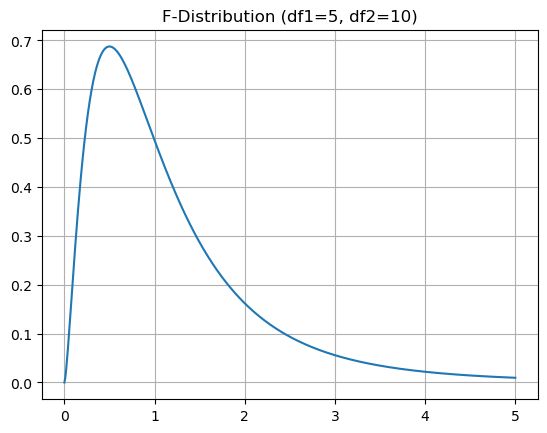

In [53]:
# 21. Visualize F-distribution
x = np.linspace(0, 5, 500)
f_dist = f.pdf(x, dfn=5, dfd=10)
plt.plot(x, f_dist)
plt.title("F-Distribution (df1=5, df2=10)")
plt.grid()
plt.show()

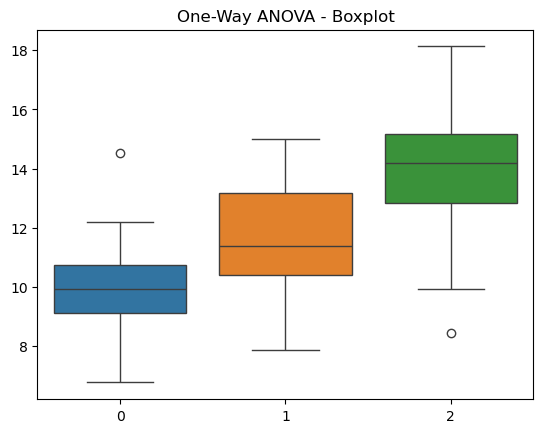

In [55]:
# 22. One-way ANOVA + boxplot
sns.boxplot(data=[g1, g2, g3])
plt.title("One-Way ANOVA - Boxplot")
plt.show()


In [57]:
# 23. Simulate data from normal distribution and test means
sim_data = np.random.normal(loc=100, scale=15, size=200)
sample_mean = np.mean(sim_data)
print("Simulated Mean:", sample_mean)


Simulated Mean: 98.50464081945664


In [59]:
# 24. Hypothesis test for population variance using Chi-square
sample_var = np.var(sim_data, ddof=1)
n = len(sim_data)
chi_stat = (n - 1) * sample_var / 225  # Assume σ^2 = 15^2
p_val = 1 - chi2.cdf(chi_stat, df=n-1)
print("Chi-square stat for variance:", chi_stat, "P-value:", p_val)

Chi-square stat for variance: 211.28986215143934 P-value: 0.2620467969921071


In [61]:
# 25. Z-test for comparing proportions
from statsmodels.stats.proportion import proportions_ztest

count = np.array([60, 70])
nobs = np.array([100, 100])
z_stat, p_val = proportions_ztest(count, nobs)
print("Z-statistic (proportions):", z_stat, "P-value:", p_val)

Z-statistic (proportions): -1.482498633322202 P-value: 0.1382076669740258


In [63]:
# 26. F-test for comparing variances of two datasets
data1 = np.random.normal(0, 1, 50)
data2 = np.random.normal(0, 2, 50)
f_stat = np.var(data1, ddof=1) / np.var(data2, ddof=1)
df1 = len(data1) - 1
df2 = len(data2) - 1
p_val = 1 - f.cdf(f_stat, df1, df2)
print("F-test stat:", f_stat, "P-value:", p_val)

F-test stat: 0.29442512607774274 P-value: 0.9999823220042287


In [65]:
# 27. Chi-square goodness of fit with simulated data
observed = np.array([20, 30, 50])
expected = np.array([33.33, 33.33, 33.33])
chi2_stat = ((observed - expected)**2 / expected).sum()
p_val = 1 - chi2.cdf(chi2_stat, df=len(observed)-1)
print("Chi-square goodness of fit:", chi2_stat, "P-value:", p_val)

Chi-square goodness of fit: 14.001401140114012 P-value: 0.0009112433520768182
